In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram

In [25]:
def bipartiteWalk(N,qc,qreg,qcoin):
    qc.x(qreg[N-1])
    qc.h(qcoin)
    qc.swap(qreg[:-1],qcoin)
    
def runWalk(N,qc,qreg,qcoin,creg,steps):
    for i in range(steps):
        bipartiteWalk(N,qc,qreg,qcoin)
        qc.barrier()
        qc.measure(qreg,creg)
        qc.barrier()

    return qc



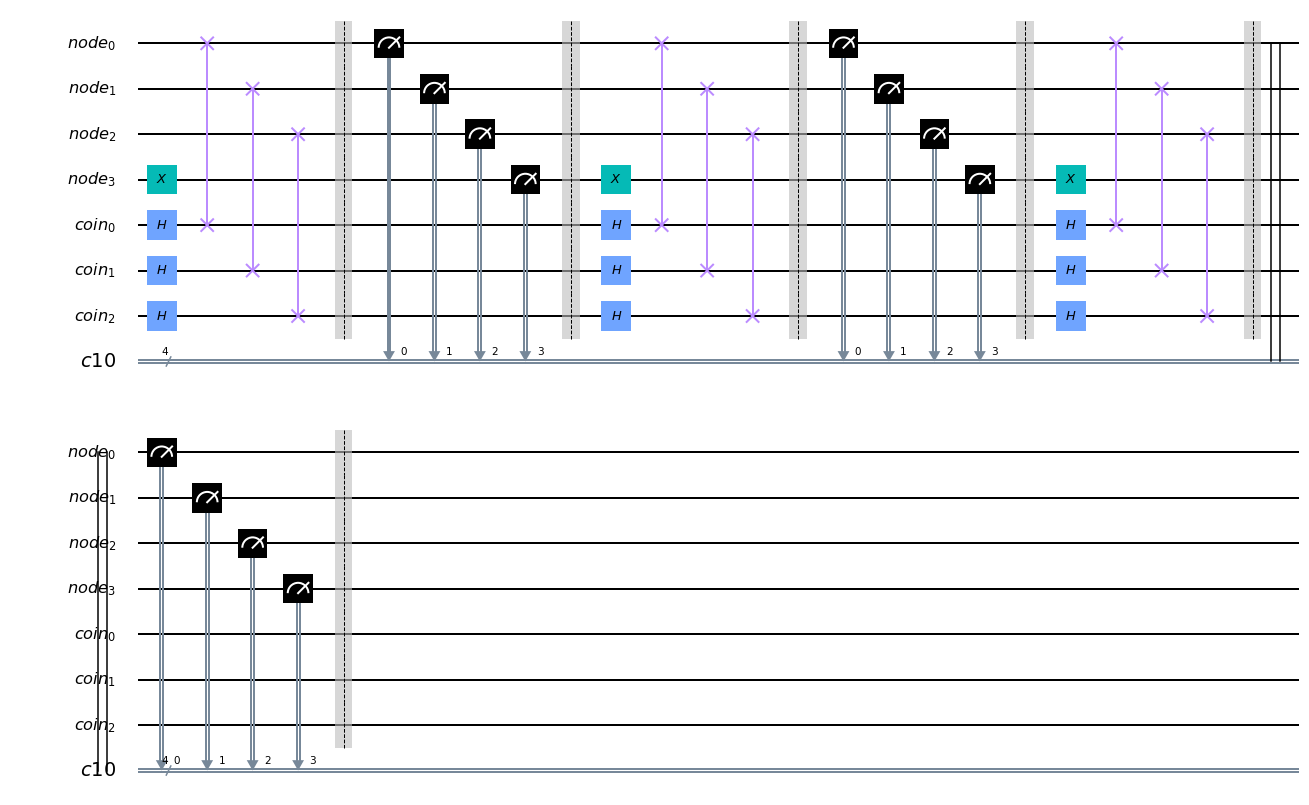

In [26]:
n=4
#qb = QuantumRegister(1,'b')
qreg = QuantumRegister(n,'node')
qcoin = QuantumRegister(n-1,'coin')
creg = ClassicalRegister(n)

qc= QuantumCircuit(qreg,qcoin,creg)
steps = 3


runWalk(n,qc,qreg,qcoin,creg,steps)

qc.draw(output='mpl')
#print(qreg[0:n-1])

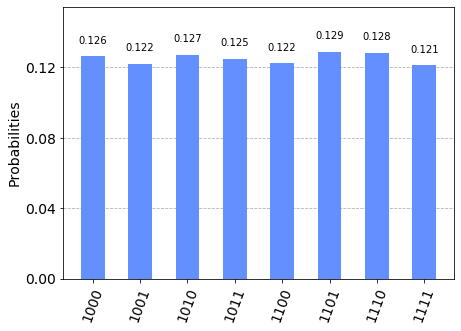

In [27]:
circ1 = qc
#circuit building
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)

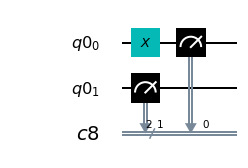

In [20]:
qreg1 = QuantumRegister(2)
creg1 = ClassicalRegister(2)
qc1 = QuantumCircuit(qreg1,creg1)

qc1.x(qreg1[0])
qc1.measure(qreg1[0],creg1[0])
qc1.measure(qreg1[1],creg1[1])


qc1.draw(output='mpl')


In [ ]:
circ1 = qc1
#circuit building
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)